## Notebook for plots - THIN processors core analysis

In [2]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

## Import the data 

In [3]:
# -----------------CLOSE----------------------------------------
# blis path
path_close_blis_double = 'output_close_size/blis_double.csv'
path_close_blis_float = 'output_close_size/blis_float.csv'

# mkl path
path_close_mkl_double = 'output_close_size/mkl_double.csv'
path_close_mkl_float = 'output_close_size/mkl_float.csv'

# openblas path
path_close_oblas_double = 'output_close_size/oblas_double.csv'
path_close_oblas_float = 'output_close_size/oblas_float.csv'


# blis dataset
close_blis_double = pd.read_csv(path_close_blis_double)
close_blis_float = pd.read_csv(path_close_blis_float)

# mkl dataset
close_mkl_double = pd.read_csv(path_close_mkl_double)
close_mkl_float = pd.read_csv(path_close_mkl_float)

# openblas dataset
close_oblas_double = pd.read_csv(path_close_oblas_double)
close_oblas_float = pd.read_csv(path_close_oblas_float)


# -----------------SPREAD----------------------------------------
# blis path
path_spread_blis_double = 'output_spread_size/blis_double.csv'
path_spread_blis_float = 'output_spread_size/blis_float.csv'

# mkl path
path_spread_mkl_double = 'output_spread_size/mkl_double.csv'
path_spread_mkl_float = 'output_spread_size/mkl_float.csv'

# openblas path
path_spread_oblas_double = 'output_spread_size/oblas_double.csv'
path_spread_oblas_float = 'output_spread_size/oblas_float.csv'


# blis dataset
spread_blis_double = pd.read_csv(path_spread_blis_double)
spread_blis_float = pd.read_csv(path_spread_blis_float)

# mkl dataset
spread_mkl_double = pd.read_csv(path_spread_mkl_double)
spread_mkl_float = pd.read_csv(path_spread_mkl_float)

# openblas dataset
spread_oblas_double = pd.read_csv(path_spread_oblas_double)
spread_oblas_float = pd.read_csv(path_spread_oblas_float)

## Manipulate the data

In [4]:
# extract the first row for the x axis

n_threads = close_oblas_double['n_threads']
n_threads = sorted(n_threads.unique())


In [5]:
# Each mean_ and stds_ has two column, the first about time the second GFLOPS

# close blis double -> cbd
grouped_cbd = close_blis_double.groupby('n_threads')
means_cbd = grouped_cbd.mean().to_numpy()
stds_cbd = grouped_cbd.std().to_numpy()

# close blis float -> cbf
grouped_cbf = close_blis_float.groupby('n_threads')
means_cbf = grouped_cbf.mean().to_numpy()
stds_cbf = grouped_cbf.std().to_numpy()

# close mkl double -> cmd
grouped_cmd = close_mkl_double.groupby('n_threads')
means_cmd = grouped_cmd.mean().to_numpy()
stds_cmd = grouped_cmd.std().to_numpy()

# close mkl float -> cmf
grouped_cmf = close_mkl_float.groupby('n_threads')
means_cmf = grouped_cmf.mean().to_numpy()
stds_cmf = grouped_cmf.std().to_numpy()

# close oblas double -> cod
grouped_cod = close_oblas_double.groupby('n_threads')
means_cod = grouped_cod.mean().to_numpy()
stds_cod = grouped_cod.std().to_numpy()

# close oblas float -> cof
grouped_cof = close_oblas_float.groupby('n_threads')
means_cof = grouped_cof.mean().to_numpy()
stds_cof = grouped_cof.std().to_numpy()

#----------------------------

# spread blis double -> sbd
grouped_sbd = spread_blis_double.groupby('n_threads')
means_sbd = grouped_sbd.mean().to_numpy()
stds_sbd = grouped_sbd.std().to_numpy()

# spread blis float -> sbf
grouped_sbf = spread_blis_float.groupby('n_threads')
means_sbf = grouped_sbf.mean().to_numpy()
stds_sbf = grouped_sbf.std().to_numpy()

# spread mkl double -> smd
grouped_smd = spread_mkl_double.groupby('n_threads')
means_smd = grouped_smd.mean().to_numpy()
stds_smd = grouped_smd.std().to_numpy()

# spread mkl float -> smf
grouped_smf = spread_mkl_float.groupby('n_threads')
means_smf = grouped_smf.mean().to_numpy()
stds_smf = grouped_smf.std().to_numpy()

# spread oblas double -> sod
grouped_sod = spread_oblas_double.groupby('n_threads')
means_sod = grouped_sod.mean().to_numpy()
stds_sod = grouped_sod.std().to_numpy()

# spread oblas float -> sof
grouped_sof = spread_oblas_float.groupby('n_threads')
means_sof = grouped_sof.mean().to_numpy()
stds_sof = grouped_sof.std().to_numpy()

In [6]:
speedup_cbd = means_cbd[0,0]/means_cbd[:,0]
speedup_cbf = means_cbf[0,0]/means_cbf[:,0]

speedup_cmd = means_cmd[0,0]/means_cmd[:,0]
speedup_cmf = means_cmf[0,0]/means_cmf[:,0]

speedup_cod = means_cod[0,0]/means_cod[:,0]
speedup_cof = means_cof[0,0]/means_cof[:,0]

#------------

speedup_sbd = means_sbd[0,0]/means_sbd[:,0]
speedup_sbf = means_sbf[0,0]/means_sbf[:,0]

speedup_smd = means_smd[0,0]/means_smd[:,0]
speedup_smf = means_smf[0,0]/means_smf[:,0]

speedup_sod = means_sod[0,0]/means_sod[:,0]
speedup_sof = means_sof[0,0]/means_sof[:,0]



## Plots

### Plot size vs time (double)

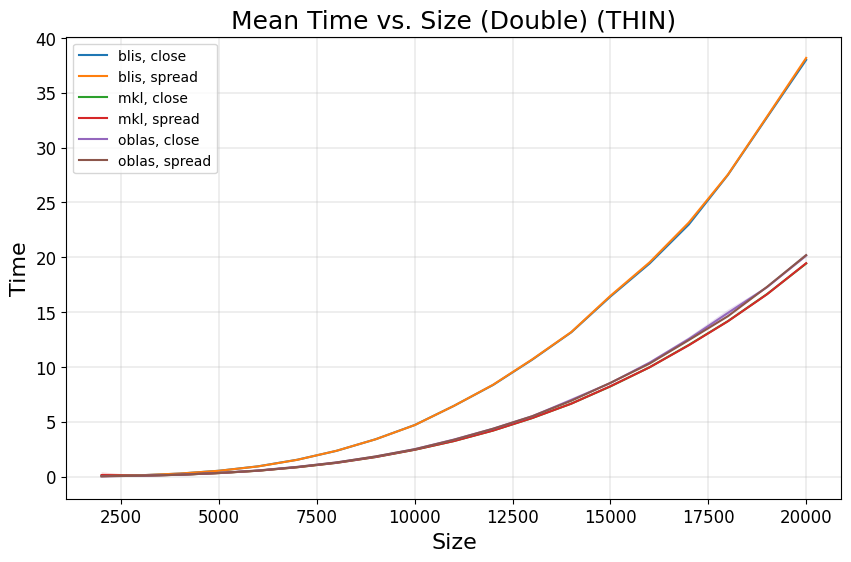

In [7]:
plt.figure(figsize=(10, 6))

plt.plot(n_threads, means_cbd[:,0], label = 'blis, close')
plt.plot(n_threads, means_sbd[:,0], label = 'blis, spread')
plt.plot(n_threads, means_cmd[:,0], label = 'mkl, close')
plt.plot(n_threads, means_smd[:,0], label = 'mkl, spread')
plt.plot(n_threads, means_cod[:,0], label = 'oblas, close')
plt.plot(n_threads, means_sod[:,0], label = 'oblas, spread')

plt.fill_between(n_threads, means_cbd[:,0] - stds_cbd[:,0], means_cbd[:,0] + stds_cbd[:,0], alpha=0.2)
plt.fill_between(n_threads, means_sbd[:,0] - stds_sbd[:,0], means_sbd[:,0] + stds_sbd[:,0], alpha=0.2)
plt.fill_between(n_threads, means_cmd[:,0] - stds_cmd[:,0], means_cmd[:,0] + stds_cmd[:,0], alpha=0.2)
plt.fill_between(n_threads, means_smd[:,0] - stds_smd[:,0], means_smd[:,0] + stds_smd[:,0], alpha=0.2)
plt.fill_between(n_threads, means_cod[:,0] - stds_cod[:,0], means_cod[:,0] + stds_cod[:,0], alpha=0.2)
plt.fill_between(n_threads, means_sod[:,0] - stds_sod[:,0], means_sod[:,0] + stds_sod[:,0], alpha=0.2)


plt.xlabel('Size', fontsize = 16)
plt.ylabel('Time', fontsize = 16)
plt.title('Mean Time vs. Size (Double) (THIN)', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=10)

plt.grid(linewidth = 0.3)
plt.show()


### Plot size vs time (float)

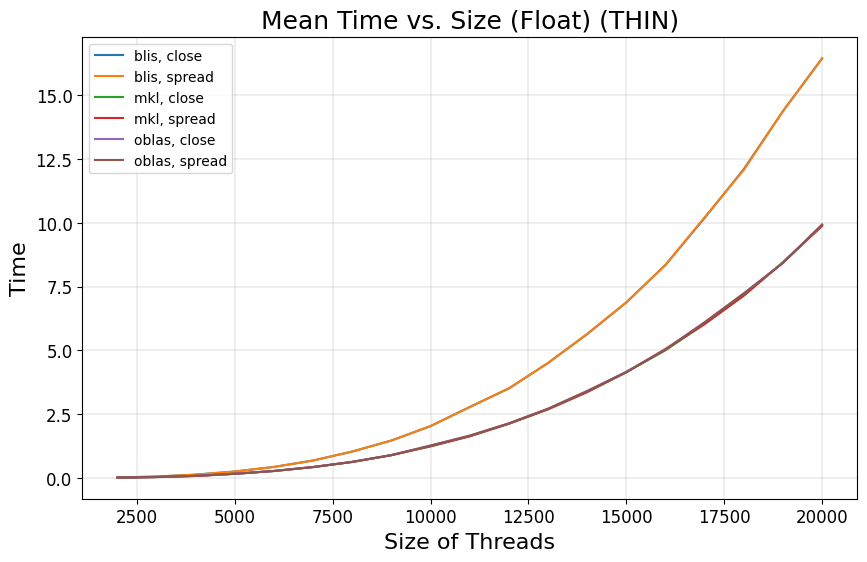

In [8]:
plt.figure(figsize=(10, 6))

plt.plot(n_threads, means_cbf[:,0], label = 'blis, close')
plt.plot(n_threads, means_sbf[:,0], label = 'blis, spread')
plt.plot(n_threads, means_cmf[:,0], label = 'mkl, close')
plt.plot(n_threads, means_smf[:,0], label = 'mkl, spread')
plt.plot(n_threads, means_cof[:,0], label = 'oblas, close')
plt.plot(n_threads, means_sof[:,0], label = 'oblas, spread')

plt.fill_between(n_threads, means_cbf[:,0] - stds_cbf[:,0], means_cbf[:,0] + stds_cbf[:,0], alpha=0.2)
plt.fill_between(n_threads, means_sbf[:,0] - stds_sbf[:,0], means_sbf[:,0] + stds_sbf[:,0], alpha=0.2)
plt.fill_between(n_threads, means_cmf[:,0] - stds_cmf[:,0], means_cmf[:,0] + stds_cmf[:,0], alpha=0.2)
plt.fill_between(n_threads, means_smf[:,0] - stds_smf[:,0], means_smf[:,0] + stds_smf[:,0], alpha=0.2)
plt.fill_between(n_threads, means_cof[:,0] - stds_cof[:,0], means_cof[:,0] + stds_cof[:,0], alpha=0.2)
plt.fill_between(n_threads, means_sof[:,0] - stds_sof[:,0], means_sof[:,0] + stds_sof[:,0], alpha=0.2)


plt.xlabel('Size of Threads', fontsize = 16)
plt.ylabel('Time', fontsize = 16)
plt.title('Mean Time vs. Size (Float) (THIN)', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=10)

plt.grid(linewidth = 0.3)
plt.show()


### Plot size vs GFLOPS (Double)

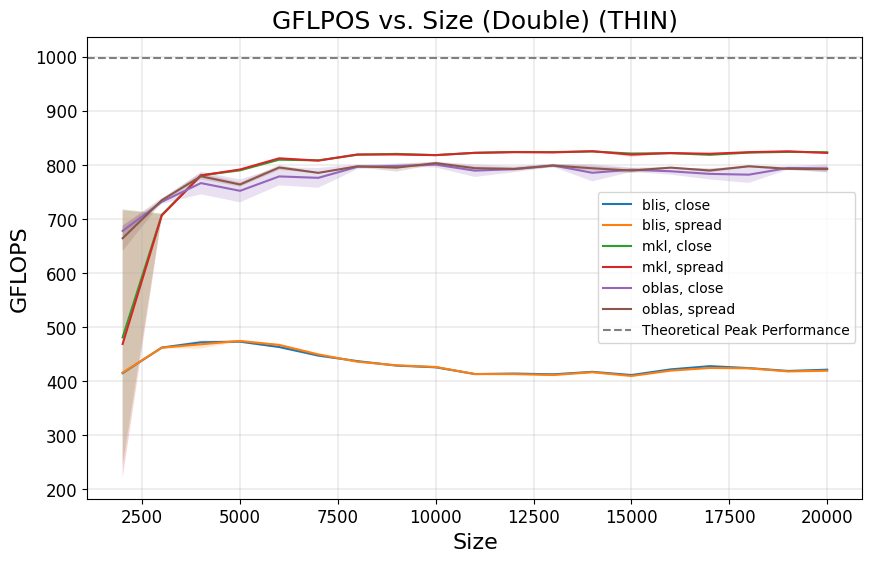

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(n_threads, means_cbd[:,1], label = 'blis, close')
plt.plot(n_threads, means_sbd[:,1], label = 'blis, spread')
plt.plot(n_threads, means_cmd[:,1], label = 'mkl, close')
plt.plot(n_threads, means_smd[:,1], label = 'mkl, spread')
plt.plot(n_threads, means_cod[:,1], label = 'oblas, close')
plt.plot(n_threads, means_sod[:,1], label = 'oblas, spread')

plt.fill_between(n_threads, means_cbd[:,1] - stds_cbd[:,1], means_cbd[:,1] + stds_cbd[:,1], alpha=0.2)
plt.fill_between(n_threads, means_sbd[:,1] - stds_sbd[:,1], means_sbd[:,1] + stds_sbd[:,1], alpha=0.2)
plt.fill_between(n_threads, means_cmd[:,1] - stds_cmd[:,1], means_cmd[:,1] + stds_cmd[:,1], alpha=0.2)
plt.fill_between(n_threads, means_smd[:,1] - stds_smd[:,1], means_smd[:,1] + stds_smd[:,1], alpha=0.2)
plt.fill_between(n_threads, means_cod[:,1] - stds_cod[:,1], means_cod[:,1] + stds_cod[:,1], alpha=0.2)
plt.fill_between(n_threads, means_sod[:,1] - stds_sod[:,1], means_sod[:,1] + stds_sod[:,1], alpha=0.2)

plt.axhline(y = 83.2*12, color = 'gray', label = "Theoretical Peak Performance", linestyle='dashed')


plt.xlabel('Size', fontsize = 16)
plt.ylabel('GFLOPS', fontsize = 16)
plt.title('GFLPOS vs. Size (Double) (THIN)', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=10)


plt.grid(linewidth = 0.3)
plt.show()


### Plot size vs GFLOPS (Float)

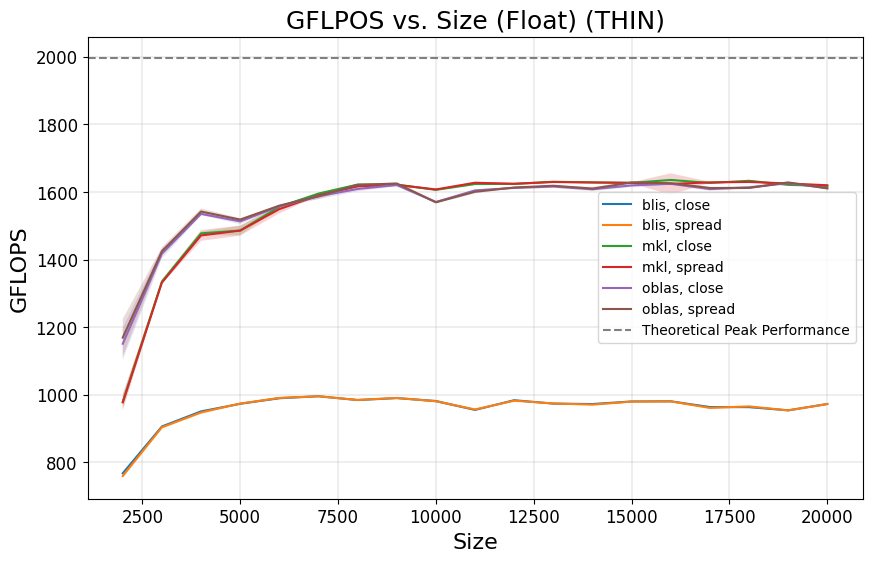

In [10]:
plt.figure(figsize=(10, 6))

plt.plot(n_threads, means_cbf[:,1], label = 'blis, close')
plt.plot(n_threads, means_sbf[:,1], label = 'blis, spread')
plt.plot(n_threads, means_cmf[:,1], label = 'mkl, close')
plt.plot(n_threads, means_smf[:,1], label = 'mkl, spread')
plt.plot(n_threads, means_cof[:,1], label = 'oblas, close')
plt.plot(n_threads, means_sof[:,1], label = 'oblas, spread')

plt.fill_between(n_threads, means_cbf[:,1] - stds_cbf[:,1], means_cbf[:,1] + stds_cbf[:,1], alpha=0.2)
plt.fill_between(n_threads, means_sbf[:,1] - stds_sbf[:,1], means_sbf[:,1] + stds_sbf[:,1], alpha=0.2)
plt.fill_between(n_threads, means_cmf[:,1] - stds_cmf[:,1], means_cmf[:,1] + stds_cmf[:,1], alpha=0.2)
plt.fill_between(n_threads, means_smf[:,1] - stds_smf[:,1], means_smf[:,1] + stds_smf[:,1], alpha=0.2)
plt.fill_between(n_threads, means_cof[:,1] - stds_cof[:,1], means_cof[:,1] + stds_cof[:,1], alpha=0.2)
plt.fill_between(n_threads, means_sof[:,1] - stds_sof[:,1], means_sof[:,1] + stds_sof[:,1], alpha=0.2)

plt.axhline(y = 83.2*12*2, color = 'gray', label = "Theoretical Peak Performance", linestyle='dashed')


plt.xlabel('Size', fontsize = 16)
plt.ylabel('GFLOPS', fontsize = 16)
plt.title('GFLPOS vs. Size (Float) (THIN)', fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=10)


plt.grid(linewidth = 0.3)
plt.show()
